(2099971, 82)
(2099971,)


13125/13125 ━━━━━━━━━━━━━━━━━━━━ 5s 364us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    316788
           1       1.00      1.00      1.00    103207

    accuracy                           1.00    419995
   macro avg       1.00      1.00      1.00    419995
weighted avg       1.00      1.00      1.00    419995



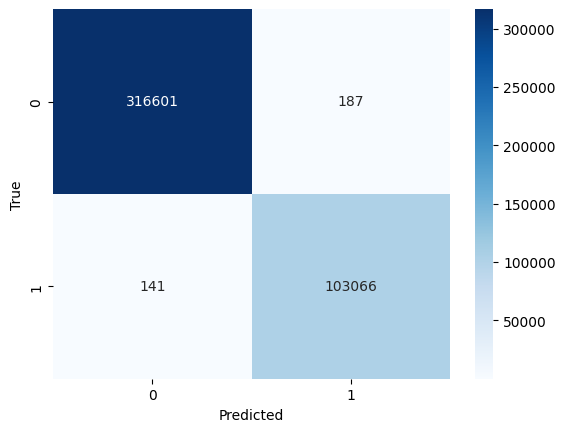

In [ ]:
import sys
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Add the parent directory (project root) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data_processing import preprocess
from src.evaluate import evaluate_model
from tensorflow.keras.models import load_model

# Load preprocessed data
df = pd.read_csv('./data/CICIDS2017_improved/full_dataset.csv')
df = preprocess(df)


X = df.drop('Label', axis=1)
y = df['Label']

print(X.shape)
print(y.shape)

# Split the data exactly the same way
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load model and evaluate
model = load_model('outputs/models/best_model.h5')
evaluate_model(model, X_test, y_test)
